In [416]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def rule3(Aun, Bun):
    Qun = np.sqrt(Aun**2 + Bun**2)
    return Qun

def rule4(Q, Ae, Be, Aun, Bun, A, B):
    Qun = np.abs(Q)*np.sqrt(((Ae*Aun/A)**2)+((Be*Bun/B)**2))
    return Qun

def rfromvi(V, I):
    R = (V/I)
    return R

def addohms(O):
    Ohms = (np.sum(O**-1))**-1
    return Ohms

def ohmsbruteforce(A, Aun):
    ohmsun = np.abs(addohms(np.average(A)) - addohms(np.average(A) + Aun))
    return ohmsun

In [417]:
#Variables

#Measured Values (O=Ohms)

OMystery = 81.5
O24 = 23.8
O100 = 98.5

#Measurement Uncertainties (V=Volts, A=Amps)
V_un = .1
A_un = .001
O_un = .05

#Experimental Values Unknown Resistor

V1 = .254 ; A1 = .003
V2 = .499 ; A2 = .006
V3 = 1.015 ; A3 = .013
V4 = 1.975 ; A4 = .024
V5 = 3.015 ; A5 = .037
V6 = 4.092 ; A6 = .051
V7 = 5.014 ; A7 = .062
V8 = 6.063 ; A8 = .075
V9 = 7.03 ; A9 = .087
V10 = 8.01 ; A10 = .100
V11 = 9.00 ; A11 = .112
V12 = 10.00 ; A12 = .125

#Series Experimental Values

VTotal_S = 4.996
V24_S = .980
V100_S = 4.054
A24_S = .041
A100_S = .041

#Parallel Experimental Values
#Total Voltage = 5.122

V24_P = 4.991
V100_P = 5.065
A24_P = .217
A100_P = .052

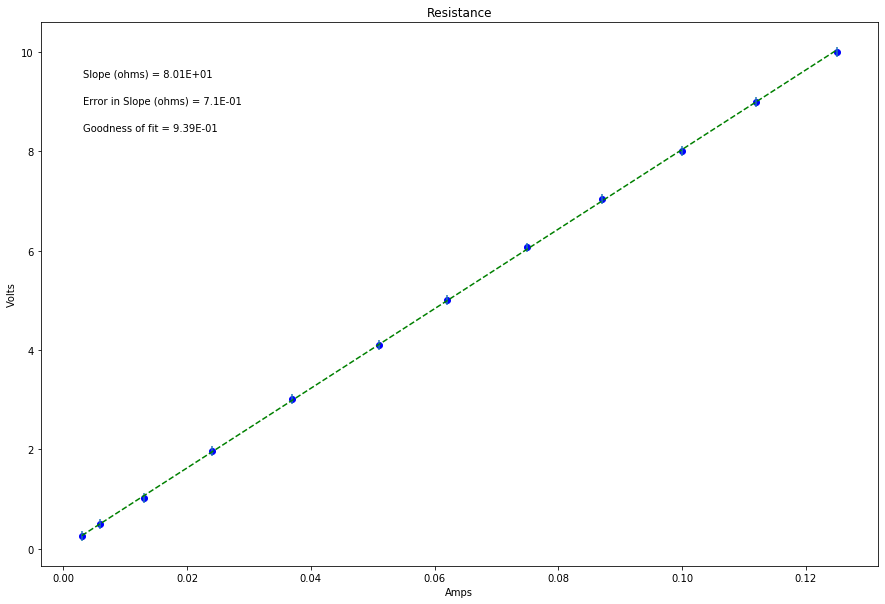

Our calculated value for resistance was 80.1 +/- 0.7 ohms. Our measured value was 81.5 ohms.


In [418]:
V_array = np.array ([V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12])
A_array = np.array ([A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12])

x = A_array   #this should be the array you want to plot on the x axis
y = V_array
dy = np.array([V_un]*12)  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('Amps')
plt.ylabel('Volts')
plt.title('Resistance')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (ohms) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (ohms) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()

print('Our calculated value for resistance was', '%.1f' % m, '+/-', '%.1f' % dm,'ohms. Our measured value was', OMystery,'ohms.')

In [419]:
#Series Equations

OTotalSer = (O24+O100)
OTotalSer_un = rule3(O_un, O_un)

#O24_S = rfromvi(V24_S, A24_S)
#O100_S = rfromvi(V100_S, A100_S)
OTotal_S = rfromvi(VTotal_S, .5*(A24_S+A100_S))
OTotal_S_un = rule4(OTotal_S, 1, -1, V_un, A_un, VTotal_S, .5*(A24_S+A100_S))

print('Our calculated value for series total resistance was', '%.1f' % OTotal_S, '+/-', '%.1f' % OTotal_S_un, 'ohms. Our measured value for series total \
resistance was', '%.1f' % OTotalSer, '+/-', '%.1f' % OTotalSer_un,'ohms.')

Our calculated value for series total resistance was 121.9 +/- 3.8 ohms. Our measured value for series total resistance was 122.3 +/- 0.1 ohms.


In [420]:
#Parallel Equations

OTotalPar = addohms(np.array([O24, O100]))
OTotalPar_un = ohmsbruteforce((np.array([O24, O100])), O_un)

O24_P = rfromvi(V24_P, A24_P)
O24_P_un = rule4(O24_P, 1, -1, V_un, A_un, V24_P, A24_P)
O100_P = rfromvi(V100_P, A100_P)
O100_P_un = rule4(O100_P, 1, -1, V_un, A_un, V100_P, A100_P)
OTotal_P = addohms(np.array([O24_P, O100_P]))
OTotal_P_un = ohmsbruteforce((np.array([O24_P, O100_P])), (np.average(np.array([O24_P_un, O100_P_un]))))

print('Our calculated value for parallel total resistance was', '%.1f' % OTotal_P, '+/-', '%.1f' % OTotal_P_un, 'ohms. Our measured value for parallel \
total resistance was', '%.1f' % OTotalPar, '+/-', '%.1f' % OTotalPar_un,'ohms.')

Our calculated value for parallel total resistance was 18.6 +/- 1.6 ohms. Our measured value for parallel total resistance was 19.2 +/- 0.0 ohms.
